In [219]:
#Import the needeed package
import numpy as np
import random as rd
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [220]:
#Generating data

In [221]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])

In [222]:
#visualization

In [223]:
dataset.head()

,x,y,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0


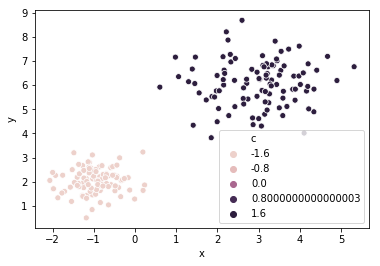

In [224]:
sns.scatterplot(x="x",y="y",hue="c",data=dataset)

In [225]:
lr = 0.001   # we initialize the learning rate

# we compute the gradient
def gradient(y,x):
    return -1*np.matmul(y.T,x)

#the predict function look at the sign of the w0 +w1*x+ w2*y and the predict if the point is above or ubder the line
def predict(inpu):
    
    pred = np.zeros(inpu.shape)
    
    pred[(inpu>0)== True]=1
    pred[(inpu>0)== False]=-1
    
    return pred


def fit_perceptron(train_X,train_y):
    
    nb_observ = train_X.shape[0]
    nb_feature = train_X.shape[1]
    
    #inialize the weight
    weight = np.zeros((nb_feature+1,1))
    
    #associate to the feature vector 1 which is the elt correspondant to intercept
    train_X = np.hstack((np.ones((nb_observ,1)),train_X))
    
    #for a giving data set we predict whether we are above or under the line
    predict_label = predict(np.matmul(train_X,weight))
        
    m_y = (predict_label.flatten()*train_y.flatten())==-1  
    train= train_y[m_y]
        
    while np.sum(m_y)>0:
        
        #compute the gradient
        grad = gradient(train,train_X[m_y]).reshape(-1,1)
        
        #we update the weight
        weight = weight - lr * grad
        #for the new weight we predict the position of the point
        predict_label = predict(np.matmul(train_X,weight))
        
        #update the variable of the while loop
        m_y = ((predict_label.flatten()*train_y.flatten())==-1)  
        print("{} miss classify points: ".format(np.sum(m_y)))
        train = train_y[m_y]
       

    return weight

In [226]:
# we test our model using the data generating up

In [227]:
final_coefficient=fit_perceptron(dataset[["x","y"]].values,dataset["c"].values)

100 miss classify points: 
92 miss classify points: 
30 miss classify points: 
11 miss classify points: 
7 miss classify points: 
4 miss classify points: 
3 miss classify points: 
3 miss classify points: 
3 miss classify points: 
3 miss classify points: 
3 miss classify points: 
3 miss classify points: 
3 miss classify points: 
3 miss classify points: 
2 miss classify points: 
2 miss classify points: 
2 miss classify points: 
1 miss classify points: 
0 miss classify points: 


In [228]:
#This is the vector of the coefficient of the best line we obtain
final_coefficient

array([[-0.175     ],
       [ 0.48402602],
       [ 0.0250917 ]])

In [229]:
#now we visualize our prediction on the data and also the plot

data = dataset[["x","y"]].values
data = np.hstack((np.ones((data.shape[0],1)),data))

c_pred = sign(np.matmul(data,final_coefficient))
dataset["predict_c"] = c_pred
dataset["predict_c"] = dataset["predict_c"].apply(lambda x:int(x))
x = np.linspace(-.5,1,100)
y = -1*(final_coefficient[0]/final_coefficient[2] + final_coefficient[1]/final_coefficient[2] * x)
dataset.head()

,x,y,c,predict_c
0,-0.334207,2.058738,-1.0,-1
1,3.264395,5.636814,1.0,1
2,-0.669884,1.856185,-1.0,-1
3,1.995284,4.484924,1.0,1
4,3.588041,4.739172,1.0,1


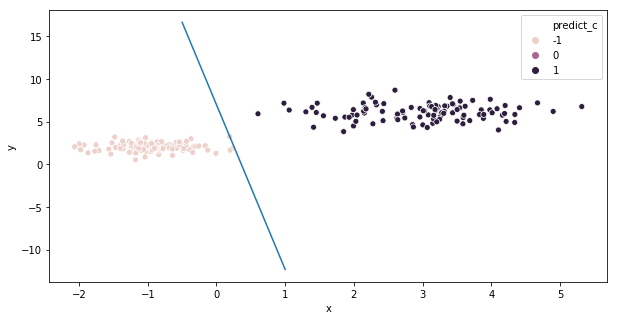

In [230]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="x",y="y",hue="predict_c",data=dataset)
sns.lineplot(x=x,y=y)